### Vaibhav Kumar
### RollNo 19

### kNN Bank

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [4]:
bank=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\bank.csv',sep=';')

In [5]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
bank['poutcome']=bank['poutcome'].map({'failure':-1,'unknown':0,'success':1,'other':0})

In [7]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
bank['housing'].unique()

array(['no', 'yes'], dtype=object)

In [9]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [10]:
bank['default']=bank['default'].map({'yes':0,'no':1})
bank['housing']=bank['housing'].map({'yes':0,'no':1})
bank['loan']=bank['loan'].map({'yes':0,'no':1})

In [11]:
nominal=['job','marital','education','contact','month']
data=pd.get_dummies(bank,columns=nominal)

In [12]:
data.shape

(4521, 46)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4521 non-null   int64 
 1   default              4521 non-null   int64 
 2   balance              4521 non-null   int64 
 3   housing              4521 non-null   int64 
 4   loan                 4521 non-null   int64 
 5   day                  4521 non-null   int64 
 6   duration             4521 non-null   int64 
 7   campaign             4521 non-null   int64 
 8   pdays                4521 non-null   int64 
 9   previous             4521 non-null   int64 
 10  poutcome             4521 non-null   int64 
 11  y                    4521 non-null   object
 12  job_admin.           4521 non-null   uint8 
 13  job_blue-collar      4521 non-null   uint8 
 14  job_entrepreneur     4521 non-null   uint8 
 15  job_housemaid        4521 non-null   uint8 
 16  job_ma

In [14]:
data['y']=data['y'].map({'yes':1,'no':0})

In [16]:
from sklearn.preprocessing import StandardScaler

data[['age','balance','day','campaign','pdays']]=StandardScaler().fit_transform(data[['age','balance','day','campaign','pdays']])

In [17]:
data.drop('duration',axis=1,inplace=True)

In [18]:
op=data.pop('y')

In [21]:
train_feat,test_feat,train_classes,test_classes=train_test_split(data,op,train_size=0.8,random_state=40)

In [78]:
knn=KNeighborsClassifier(n_neighbors=15)

In [79]:
knn.fit(train_feat,train_classes)

KNeighborsClassifier(n_neighbors=15)

In [80]:
pred=knn.predict(test_feat)

In [81]:
print("accuracy",metrics.accuracy_score(test_classes,pred))

accuracy 0.8928176795580111


0.8928176795580111 highest for k =15

In [83]:
neighbors=np.arange(1,9)

In [84]:
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [85]:
for i,k in enumerate(neighbors):
    #setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(train_feat,train_classes)
    #compute accuracy on tranning set
    train_accuracy[i]=knn.score(train_feat,train_classes)
    #compute accuracy on the test set
    test_accuracy[i]=knn.score(test_feat,test_classes)
    
    
    
    

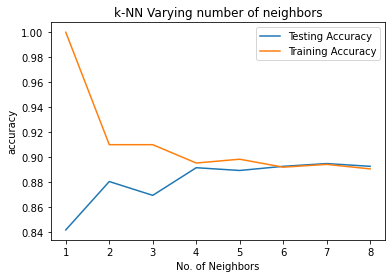

In [86]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training Accuracy')
plt.legend()
plt.xlabel("No. of Neighbors")
plt.ylabel("accuracy")
plt.show()

# predicting